# Stock Market Analysis

Web scraping from Yahoo Finance serves as a crucial tool for diverse purposes within the financial realm. By extracting historical financial data, such as stock prices, trading trends, and company information, individuals, researchers, and businesses can make well-informed decisions. Traders and investors rely on web-scraped data to analyze markets and manage portfolios effectively, while researchers leverage the vast datasets for in-depth studies on market behavior and economic trends. In the project, we will be analyzing the stocks for 5 companies: NVIDIA Corp, Meta Platforms Inc, Apple Inc, Microsoft Corp and Tesla Inc. 

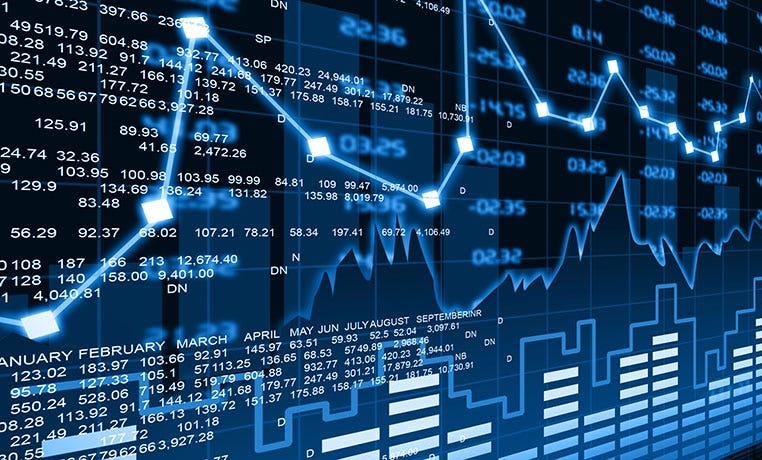

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import requests
import time
import datetime
from datetime import date
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.common.keys import Keys  
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Web Scraping from Yahoo Finance

In [2]:
# Initialize the WebDriver
driver = webdriver.Chrome()

# Define start and end dates for the data extraction
start_date = datetime.datetime(2020, 8, 18)
end_date = datetime.datetime(2023, 8, 18)

# Calculate the script_date for searching on the webpage
script_date = (start_date + datetime.timedelta(days=1)).strftime("%b %d, %Y") 

# Convert the dates to timestamps
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# List of stock symbols to fetch data for
symbols = ['NVDA', 'META', 'AAPL', 'MSFT', 'TSLA']
data = []

# Iterate over each symbol to fetch data
for symbol in symbols:
    # Construct the URL for the Yahoo Finance page for the given symbol and date range
    url = f"https://finance.yahoo.com/quote/{symbol}/history?period1={start_timestamp}&period2={end_timestamp}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
    
    # Open the URL using the WebDriver
    driver.get(url)
    
    # Allow 2 seconds for the web page to open
    time.sleep(2)  
    
    # Define variables for scrolling through the page
    scroll_pause_time = 3
    screen_height = driver.execute_script("return window.screen.height;")
    i = 1
    
    # Scroll down the page until the specified script_date is found
    while True:
        try:
            driver.find_element(By.XPATH, "//*[contains(text(), '"+ script_date +"')]")
            break
        except:
            driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))
            i += 1;[]

    # Get the page source
    page_source = driver.page_source

    # Parse the page source using BeautifulSoup
    soup = BeautifulSoup(page_source, "html.parser")

    # Remove unnecessary elements (scripts, styles, comments) from the parsed HTML
    for element in soup(['script', 'style', 'comment']):
        element.extract()
    
    # Find the table containing historical price data
    table = soup.find("table", {"data-test": "historical-prices"})

    # Extract rows from the table
    rows = table.find_all("tr")
    
    # Iterate over rows (skipping header row) to extract data
    for row in rows[1:]:
        cols = row.find_all("td")
        if len(cols) == 7:
            date = cols[0].text
            open_price = cols[1].text
            high = cols[2].text
            low = cols[3].text
            close = cols[4].text
            adj_close = cols[5].text
            volume = cols[6].text

            # Append extracted data to the 'data' list
            data.append({
                "Symbol": symbol,
                "Date": date,
                "Open": open_price,
                "High": high,
                "Low": low,
                "Close": close,
                "Adj Close": adj_close,
                "Volume": volume
            })

# Close the WebDriver
driver.quit()

# Convert the data list into a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

     Symbol          Date    Open    High     Low   Close Adj Close  \
0      NVDA  Aug 17, 2023  439.70  440.62  430.01  433.44    433.44   
1      NVDA  Aug 16, 2023  445.20  446.75  434.06  434.86    434.86   
2      NVDA  Aug 15, 2023  445.60  452.68  437.10  439.40    439.40   
3      NVDA  Aug 14, 2023  404.86  438.00  403.11  437.53    437.53   
4      NVDA  Aug 11, 2023  417.51  420.18  406.39  408.55    408.55   
...     ...           ...     ...     ...     ...     ...       ...   
3770   TSLA  Aug 24, 2020  141.75  141.93  128.50  134.28    134.28   
3771   TSLA  Aug 21, 2020  136.32  139.70  135.00  136.67    136.67   
3772   TSLA  Aug 20, 2020  124.05  134.80  123.80  133.46    133.46   
3773   TSLA  Aug 19, 2020  124.33  127.40  122.75  125.24    125.24   
3774   TSLA  Aug 18, 2020  126.60  128.26  123.01  125.81    125.81   

           Volume  
0      45,239,500  
1      52,745,100  
2      67,651,200  
3      69,028,600  
4      53,200,900  
...           ...  
3770  3

In [3]:
# Check the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Symbol     3775 non-null   object
 1   Date       3775 non-null   object
 2   Open       3775 non-null   object
 3   High       3775 non-null   object
 4   Low        3775 non-null   object
 5   Close      3775 non-null   object
 6   Adj Close  3775 non-null   object
 7   Volume     3775 non-null   object
dtypes: object(8)
memory usage: 236.1+ KB


In [4]:
# Convert the data tpye from object to more appropriate one
df['Symbol'] = df['Symbol'].astype(str)
df = df.astype({'Date': np.datetime64})
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Adj Close'] = df['Adj Close'].astype(float)

In [5]:
# Remove commas from the 'Volume' column
df['Volume'] = df['Volume'].str.replace(',', '')
# Convert the 'Volume' column to numeric
df['Volume'] = pd.to_numeric(df['Volume'])

In [6]:
# Check the data type of all columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     3775 non-null   object        
 1   Date       3775 non-null   datetime64[ns]
 2   Open       3775 non-null   float64       
 3   High       3775 non-null   float64       
 4   Low        3775 non-null   float64       
 5   Close      3775 non-null   float64       
 6   Adj Close  3775 non-null   float64       
 7   Volume     3775 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 236.1+ KB


In [7]:
# Set 'Date' column as the index
df = df.set_index('Date')

In [8]:
# Creating new DataFrames for each symbol
df_NVDA = df[df['Symbol']=='NVDA']
df_META = df[df['Symbol']=='META']
df_AAPL = df[df['Symbol']=='AAPL']
df_MSFT = df[df['Symbol']=='MSFT']
df_TSLA = df[df['Symbol']=='TSLA']

In [9]:
# Compute summary statistics for NVDA
df_NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,207.804384,211.893325,203.633020,207.918543,207.720570,4.564252e+07
std,83.665020,85.084736,82.087535,83.502727,83.540002,1.867939e+07
min,109.710000,117.350000,108.130000,112.270000,112.210000,9.788400e+06
25%,140.415000,142.610000,137.570000,140.510000,140.365000,3.205020e+07
50%,184.710000,189.640000,181.000000,186.390000,186.110000,4.462590e+07
75%,244.495000,251.175000,239.000000,244.910000,244.635000,5.649280e+07
max,474.640000,480.880000,467.420000,474.940000,474.940000,1.543911e+08


In [10]:
# Compute summary statistics for META
df_META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,248.943907,252.673987,245.485099,249.022146,249.022146,2.636698e+07
std,75.159147,75.469024,74.539814,75.055253,75.055253,1.782869e+07
min,90.080000,90.460000,88.090000,88.910000,88.910000,6.702000e+06
25%,186.240000,190.530000,182.575000,184.935000,184.935000,1.664530e+07
50%,265.530000,268.950000,261.700000,264.950000,264.950000,2.249530e+07
75%,313.525000,316.370000,309.705000,312.830000,312.830000,3.028705e+07
max,381.680000,384.330000,378.810000,382.180000,382.180000,2.323166e+08


In [11]:
# Compute summary statistics for AAPL
df_AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,148.120172,149.862079,146.450199,148.211762,146.913987,8.968595e+07
std,20.226370,20.279724,20.270608,20.285198,20.645630,3.834160e+07
min,104.540000,110.190000,103.100000,106.840000,104.940000,3.145820e+07
25%,132.160000,133.820000,130.580000,132.040000,130.595000,6.484330e+07
50%,147.440000,149.080000,145.840000,147.810000,146.430000,8.100050e+07
75%,163.430000,165.535000,161.460000,163.760000,162.765000,1.040246e+08
max,196.240000,198.230000,195.280000,196.450000,196.190000,3.459376e+08


In [12]:
# Compute summary statistics for MSFT
df_MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,269.674318,272.557748,266.764159,269.757311,265.974702,2.906089e+07
std,38.846184,38.986343,38.517342,38.788308,39.250643,1.036950e+07
min,197.190000,202.710000,196.250000,200.390000,195.030000,9.200800e+06
25%,239.100000,242.715000,236.780000,240.275000,236.995000,2.246360e+07
50%,264.450000,267.110000,261.430000,264.790000,261.440000,2.669610e+07
75%,299.385000,301.430000,296.315000,299.500000,294.575000,3.333865e+07
max,361.750000,366.780000,352.440000,359.490000,358.730000,9.042890e+07


In [13]:
# # Compute summary statistics for TSLA
df_TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,236.743709,242.103060,230.862636,236.595272,236.595272,1.087375e+08
std,63.617558,64.903705,61.999838,63.352571,63.352571,5.827584e+07
min,103.000000,111.750000,101.810000,108.100000,108.100000,2.940180e+07
25%,193.480000,198.085000,188.715000,193.720000,193.720000,6.888915e+07
50%,233.330000,238.330000,226.920000,233.030000,233.030000,9.379890e+07
75%,279.950000,284.655000,272.850000,279.790000,279.790000,1.317855e+08
max,411.470000,414.500000,405.670000,409.970000,409.970000,6.663786e+08


# Stock Analysis

In [14]:
# Create a list containing all individual DataFrames
company_list = [df_NVDA, df_META, df_AAPL, df_MSFT, df_TSLA]

## Closing Price

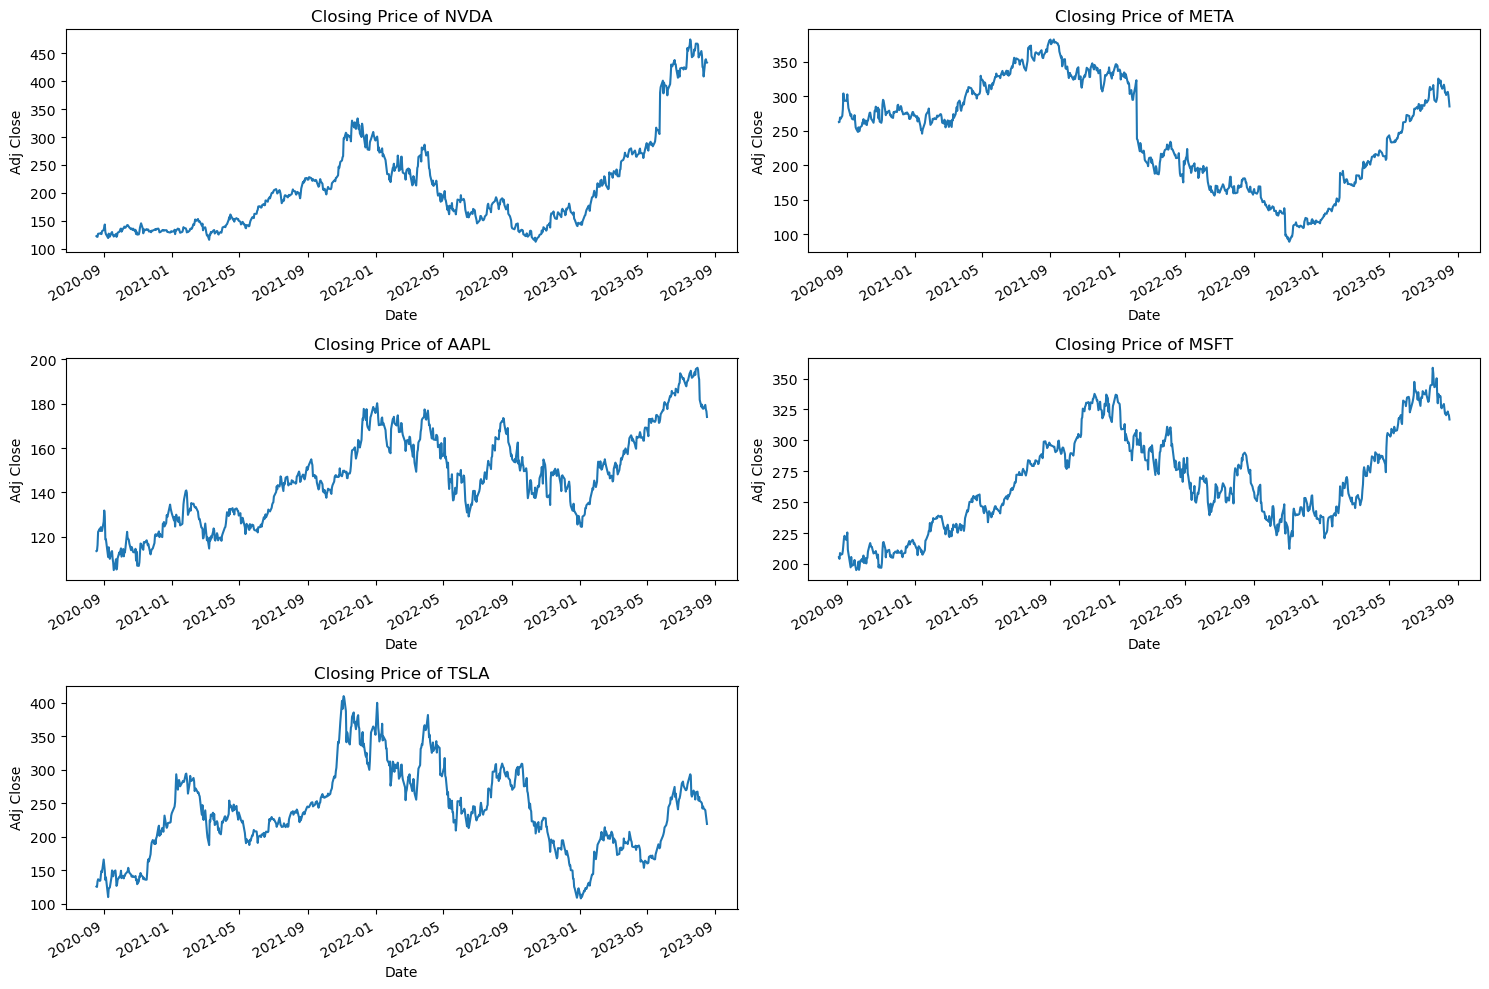

In [15]:
# Visualize historical view of the Adj closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=0.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')       
    plt.xlabel('Date')
    plt.title(f"Closing Price of {symbols[i - 1]}")
    
plt.tight_layout()

Based on the provided time series plots, it's evident that the closing prices of all the stocks have been on an upward trend since the start of 2023. Before that point, a common pattern emerged among most stocks, reaching their peak values at the onset of 2022, with the exception of META. Notably, META maintained a high price until experiencing a decline at the start of 2022.

## Sales Volume

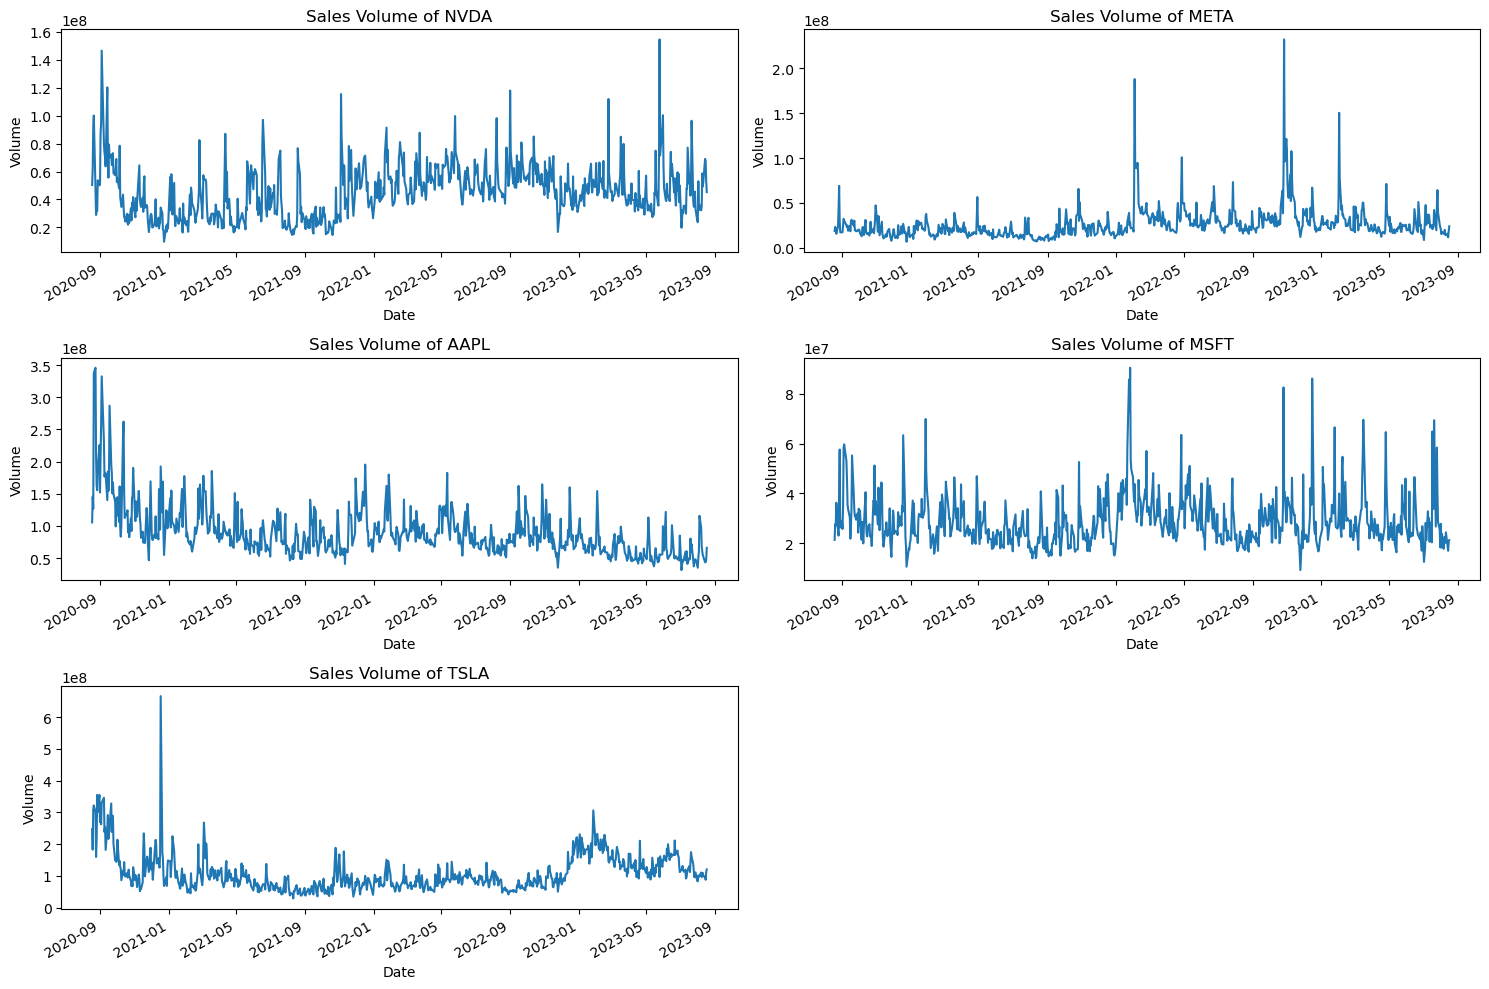

In [16]:
# Visualize historical view of the Sales Volume
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=0.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')       
    plt.xlabel('Date')
    plt.title(f"Sales Volume of {symbols[i - 1]}")
    
plt.tight_layout()

The daily sales of volume of NVDA has the least fluctuations among the 5 stocks, with a highest sales volume at around 1.5M. For META, the daily sales volume were usually less than 1M, and there were a few spikes that hit 1.5M - 2M of sales volume. For AAPL, there was a downward trend in sales volume as their daily sales volume were 2M - 3M between 2020-09 and 2020-12, but it never reached 2M daily sales volume after 2021. For MSFT, it has the highest daily sales volume as it has been always around 2M - 4M for the last 3 years. There were also times with over 6M - 9M volume, highest among the 5 stocks. Finally, the daily sales volume of TSLA were quite high in 2020 and it even reached over 7M in 2021-01. After that, it stayed at around 1M - 2M.

## Moving Average

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/2472980395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/2472980395.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/2472980395.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
/var/fold

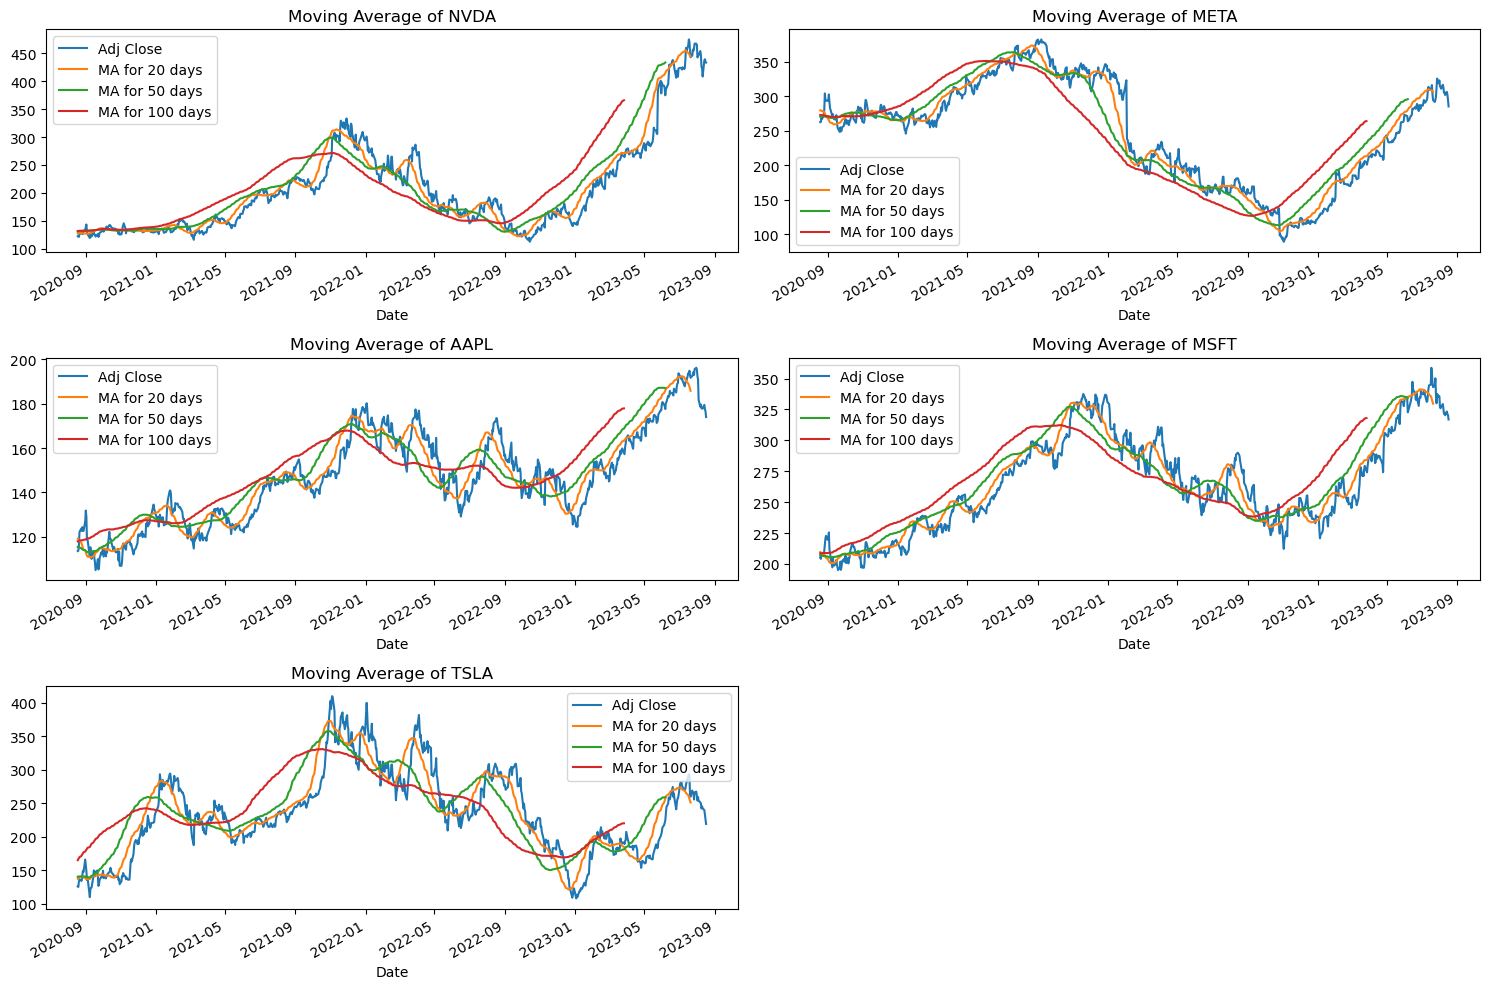

In [42]:
# Visualize historical view of the Adj closing price and 10 days, 20 days and 50 days Moving Average
ma_day = [20, 50, 100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(top=1.25, bottom=0.8, hspace=0.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=plt.gca())  # Use ax=plt.gca() to plot on current axis
    plt.title(f"Moving Average of {symbols[i - 1]}")
    plt.xlabel('Date')

plt.tight_layout()
plt.show()

The Moving Average plots illustrate that AAPL and TSLA exhibit greater fluctuations compared to the other stocks, whereas NVDA displays the highest price variability, closely followed by MSFT.

## Daily Return

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/4182801140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/4182801140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/4182801140.py:3: SettingWithCopyWarning: 
A value is trying to be set o

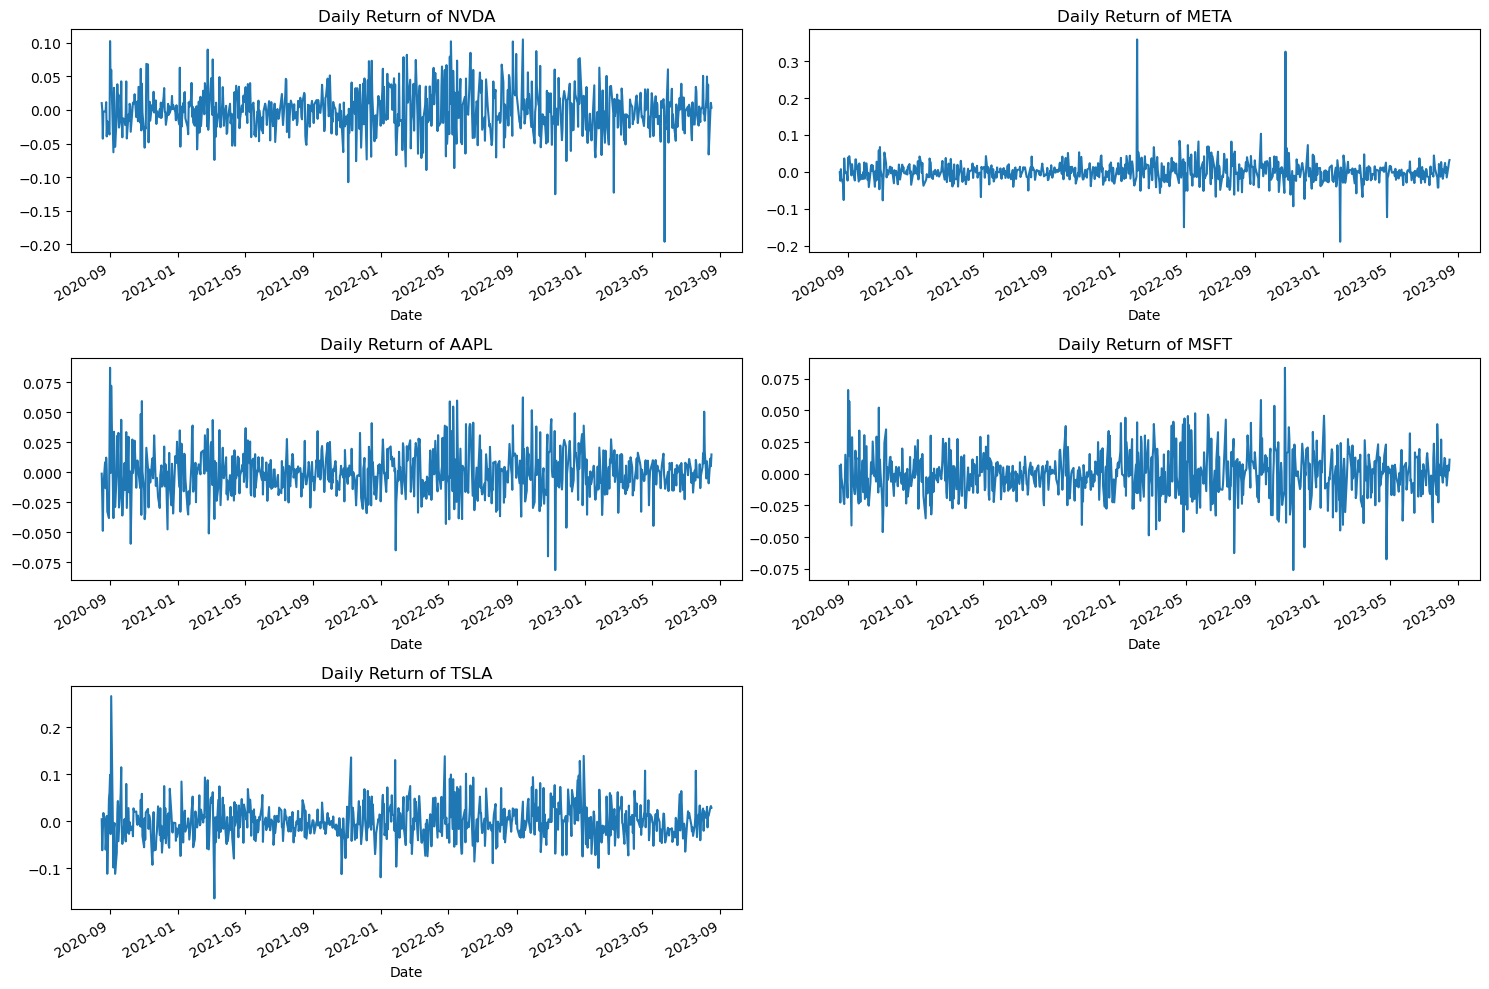

In [18]:
# Visualize historical view of the Daily Return
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(top=1.25, bottom=0.8, hspace=0.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].plot(ax=plt.gca())  # Use ax=plt.gca() to plot on current axis
    plt.title(f"Daily Return of {symbols[i - 1]}")
    plt.xlabel('Date')

plt.tight_layout()
plt.show()

The daily returns of these stocks predominantly demonstrate positivity, indicating the potential profitability of investing in them. Furthermore, a noteworthy observation is that META exhibits the lowest variability in its daily returns.

## Cumulative Return

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/231663756.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_return = df_return.append({'Company': company['Symbol'].iloc[0], 'Cum Return': cum_return}, ignore_index=True)
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/231663756.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_return = df_return.append({'Company': company['Symbol'].iloc[0], 'Cum Return': cum_return}, ignore_index=True)
/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/231663756.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_return = df_return.append({'Company': company['Symbol'].iloc[0], 'Cum Return': cum_return}, ignore_index=True)
/var/folde

Text(0.5, 1.0, 'Cumulative Returns Comparison (%)')

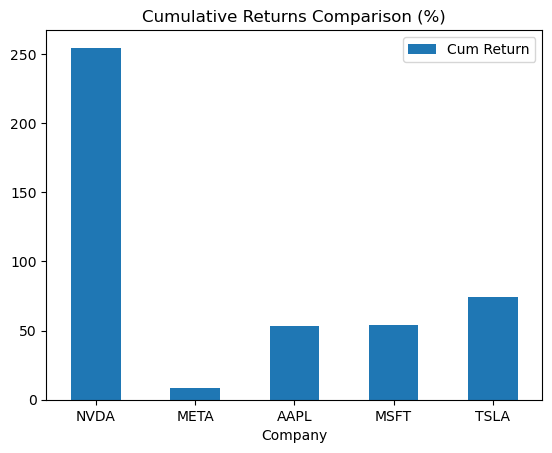

In [19]:
# Visualize the cumulative returns in the selected period for each stocks
df_return = pd.DataFrame(columns=['Company', 'Cum Return'])
for company in company_list:
    cum_return = ((company['Adj Close'][0] - company['Adj Close'][-1]) / company['Adj Close'][-1])*100
    df_return = df_return.append({'Company': company['Symbol'].iloc[0], 'Cum Return': cum_return}, ignore_index=True)
    
df_return.plot.bar(x='Company', rot=0)
plt.title("Cumulative Returns Comparison (%)")

Over the last three years, NVDA has generated the highest cumulative return among a group of five stocks, followed by TSLA, MSFT, and AAPL. These three stocks have exhibited cumulative returns ranging from 50% to 100%. On the other hand, META has shown the weakest performance within this selection of five stocks.

# Stock Predicition Model

In this section, our focus will be on constructing an LSTM prediction model designed to anticipate future stock prices by leveraging past price patterns. The data will be partitioned into training and testing sets to test model accuracy.

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

def stock_model(df):
    # Extract 'Adj Close' prices and reverse the order
    close_prices = df.iloc[::-1]['Adj Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    
    # Prepare training data
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    # Prepare testing data
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model, x_train, y_train, x_test, y_test, scaler, training_data_len

2023-08-20 23:08:19.389265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# define funtion for plotting the historical and predict stock price
def plot_graph(df, symbol, training_data_len):
    
    # Prepare the data for plotting graphs
    data = df.iloc[::-1].filter(['Adj Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predictions'] = predictions
    
    # Setting the labels, size of the graphs
    plt.figure(figsize=(16,8))
    plt.title(f"Stock Price Predicition of {symbol}")
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Adj Close', 'Predictions']])
    
    # Val refers to the real stock price, it is used to compare the prediction price
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

In [22]:
# fit the data of NVDA to the model
NVDA = stock_model(company_list[0])
# train the model
NVDA[0].fit(NVDA[1], NVDA[2], batch_size=1, epochs=5)

2023-08-20 23:08:27.163885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
544/544 [==============================] - 25s 40ms/step - loss: 0.0027
Epoch 2/5
544/544 [==============================] - 24s 44ms/step - loss: 0.0014
Epoch 3/5
544/544 [==============================] - 22s 41ms/step - loss: 9.5672e-04
Epoch 4/5
544/544 [==============================] - 19s 34ms/step - loss: 8.6866e-04
Epoch 5/5
544/544 [==============================] - 22s 40ms/step - loss: 8.6882e-04


In [23]:
# predict the stock price of NVDA and compute RMSE
predictions = NVDA[0].predict(NVDA[3])
predictions = NVDA[5].inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - NVDA[4])**2)
rmse

5/5 [==============================] - 2s 43ms/step


10.012836982777577

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/899097236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


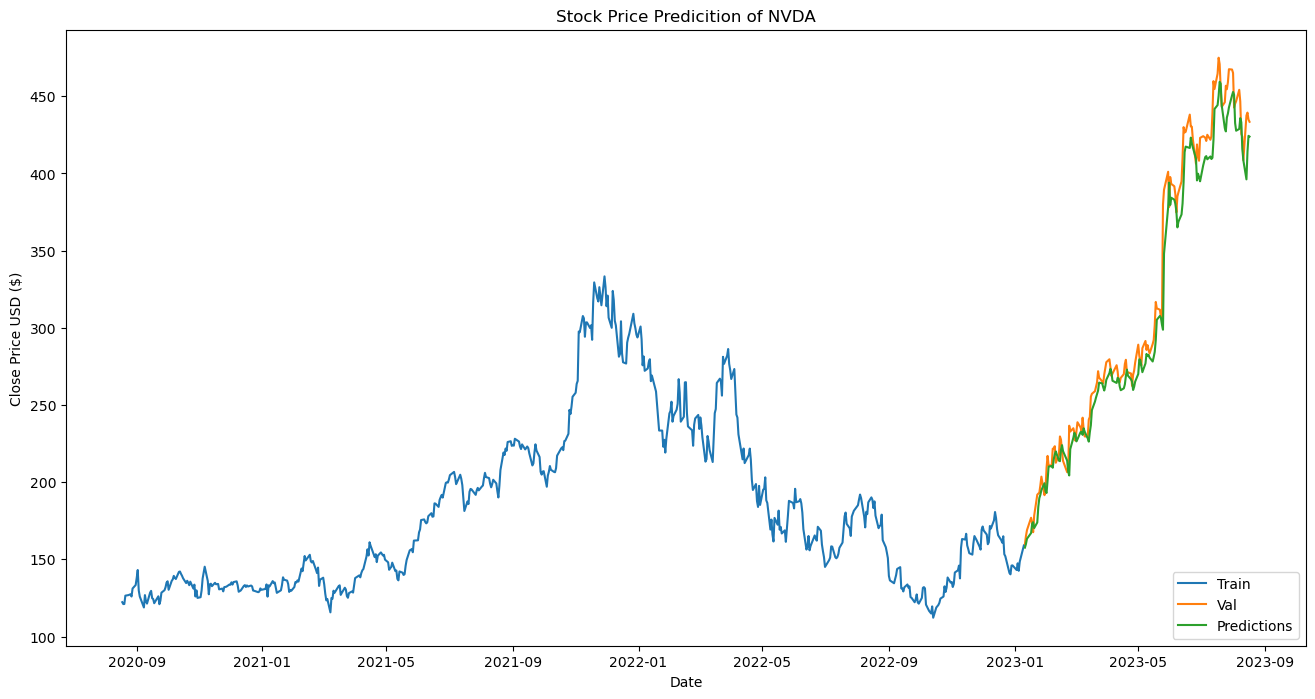

In [24]:
# visualize the result by plotting it
plot_graph(company_list[0], symbols[0], NVDA[6])

The orange line "Val" refers to the real stock price, and the green line "Predictions" is the prediction price using the model. By comparing the two lines, we can see that the predicted stock prices are usually slightly lower than the real price starting 2023-03, but overall they are still pretty close.

In [25]:
# fit the data of META to the model
META = stock_model(company_list[1])
# train the model
META[0].fit(META[1], META[2], batch_size=1, epochs=5)

Epoch 1/5
544/544 [==============================] - 32s 50ms/step - loss: 0.0052
Epoch 2/5
544/544 [==============================] - 26s 48ms/step - loss: 0.0024
Epoch 3/5
544/544 [==============================] - 27s 51ms/step - loss: 0.0020
Epoch 4/5
544/544 [==============================] - 24s 44ms/step - loss: 0.0017
Epoch 5/5
544/544 [==============================] - 20s 37ms/step - loss: 0.0014


In [26]:
# predict the stock price of META and compute RMSE
predictions = META[0].predict(META[3])
predictions = META[5].inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - META[4])**2)
rmse

5/5 [==============================] - 2s 39ms/step


0.4198350272273395

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/899097236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


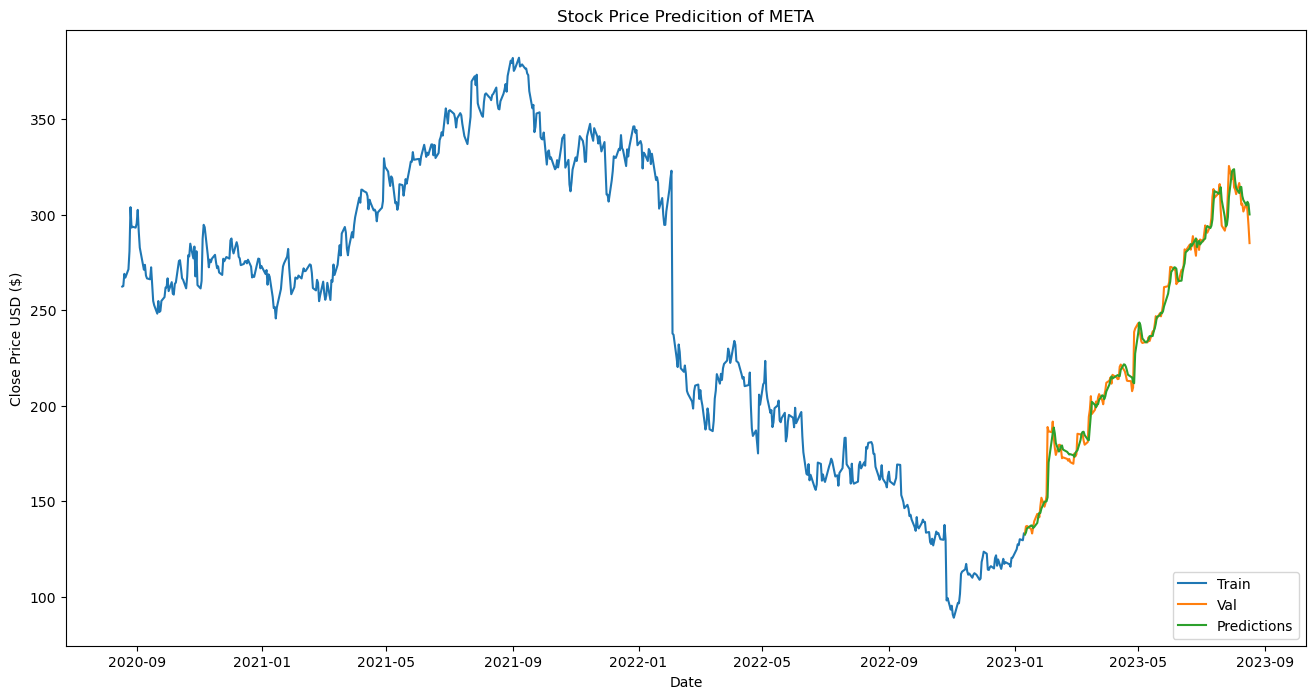

In [27]:
# visualize the result by plotting it
plot_graph(company_list[1], symbols[1], META[6])

It is seen that the "Val" and "Predictions" lines are also pretty close for the prediction model predicting price of META. However, there is a big difference between the predicted price and real price at the end of the period. The predicted price is around $15 more than the real price.

In [28]:
# fit the data of AAPL to the model
AAPL = stock_model(company_list[2])
# train the model
AAPL[0].fit(AAPL[1], AAPL[2], batch_size=1, epochs=5)

Epoch 1/5
544/544 [==============================] - 22s 35ms/step - loss: 0.0071
Epoch 2/5
544/544 [==============================] - 21s 38ms/step - loss: 0.0033
Epoch 3/5
544/544 [==============================] - 23s 43ms/step - loss: 0.0022
Epoch 4/5
544/544 [==============================] - 22s 40ms/step - loss: 0.0020
Epoch 5/5
544/544 [==============================] - 20s 36ms/step - loss: 0.0016


In [29]:
# predict the stock price of AAPL and compute RMSE
predictions = AAPL[0].predict(AAPL[3])
predictions = AAPL[5].inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - AAPL[4])**2)
rmse

5/5 [==============================] - 1s 43ms/step


1.718095444432948

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/899097236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


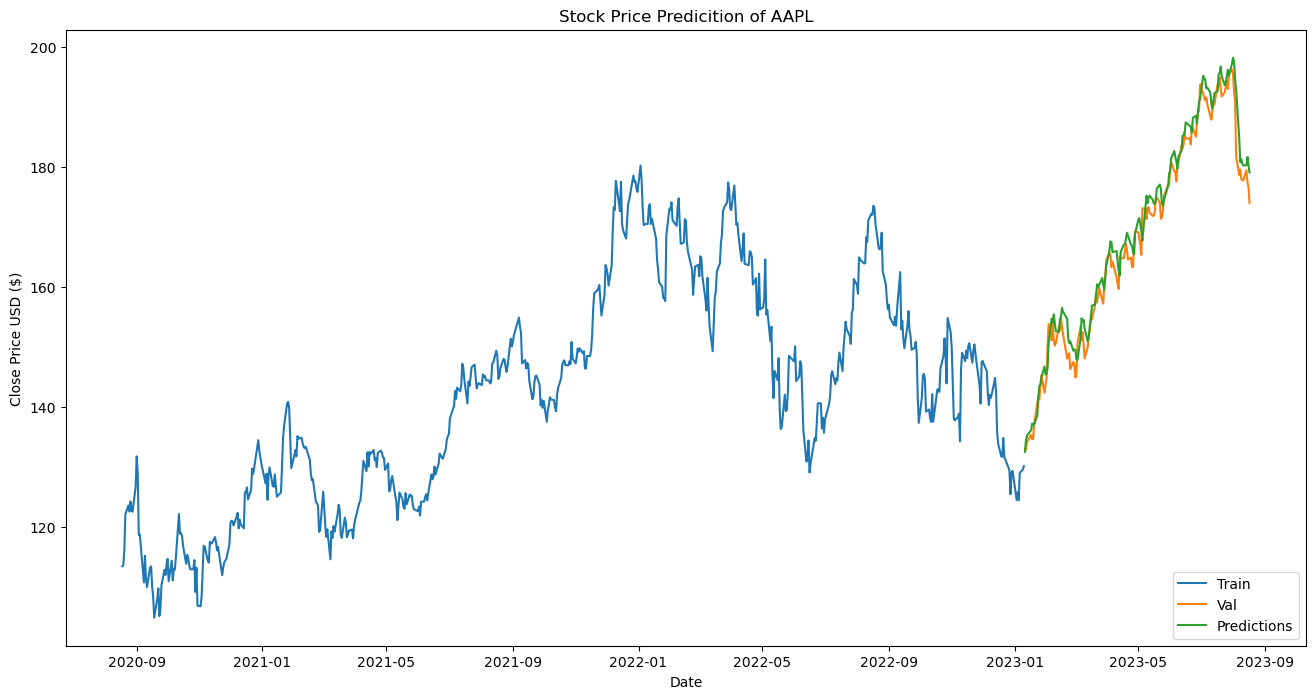

In [30]:
# visualize the result by plotting it
plot_graph(company_list[2], symbols[2], AAPL[6])

The "Predicted" line in this graph almost completely imitates the pattern of the "Val" line. The prediction prices are slightly higher. Similar to the model predicting prices of META, this model also overestimate the price of AAPL at the end of the period.

In [31]:
# fit the data of MSFT to the model
MSFT = stock_model(company_list[3])
# train the model
MSFT[0].fit(MSFT[1], MSFT[2], batch_size=1, epochs=5)

Epoch 1/5
544/544 [==============================] - 25s 40ms/step - loss: 0.0055
Epoch 2/5
544/544 [==============================] - 21s 38ms/step - loss: 0.0029
Epoch 3/5
544/544 [==============================] - 20s 37ms/step - loss: 0.0018
Epoch 4/5
544/544 [==============================] - 19s 34ms/step - loss: 0.0016
Epoch 5/5
544/544 [==============================] - 19s 35ms/step - loss: 0.0016


In [32]:
# predict the stock price of MSFT and compute RMSE
predictions = MSFT[0].predict(MSFT[3])
predictions = MSFT[5].inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - MSFT[4])**2)
rmse

5/5 [==============================] - 1s 36ms/step


6.346252154419755

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/899097236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


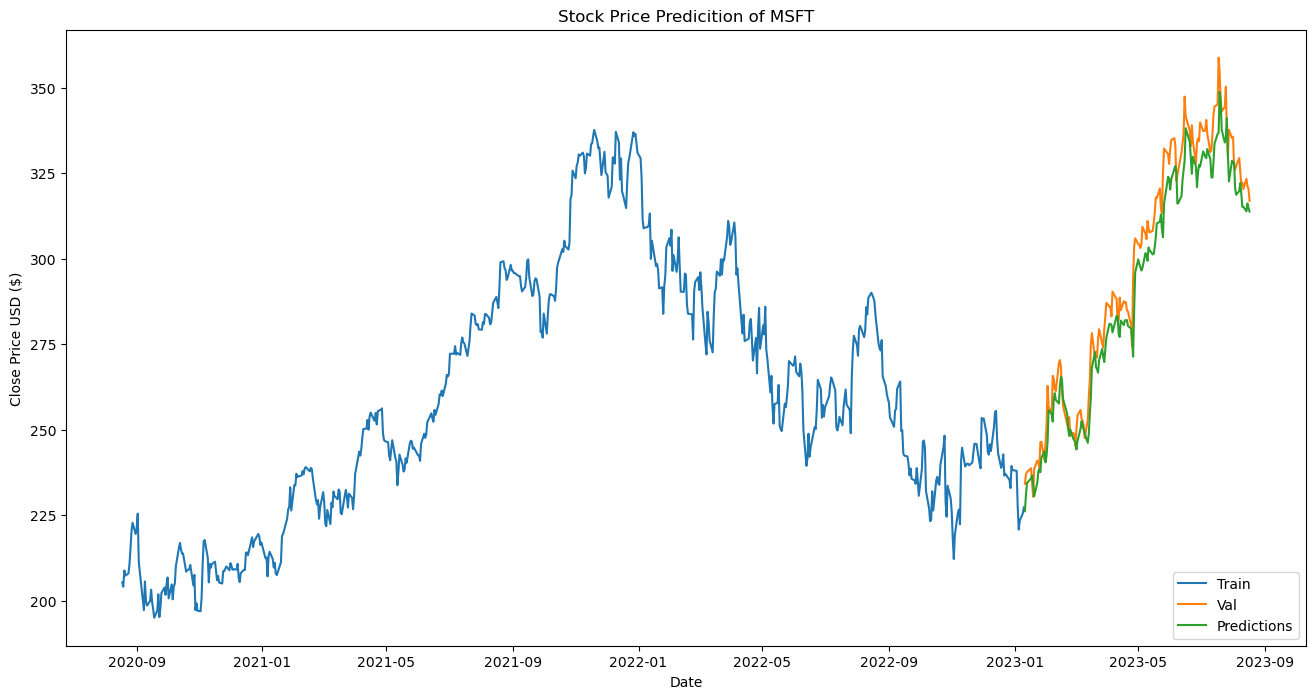

In [33]:
# visualize the result by plotting it
plot_graph(company_list[3], symbols[3], MSFT[6])

The pattern of the "Predictions" line is similar to the pattern "Val" line in this graph. The difference in the two prices at each period is bigger compared to the last three graphs. Prediction prices are lower than the real prices in this model.

In [34]:
# fit the data of TSLA to the model
TSLA = stock_model(company_list[4])
# train the model
TSLA[0].fit(TSLA[1], TSLA[2], batch_size=1, epochs=5)

Epoch 1/5
544/544 [==============================] - 22s 34ms/step - loss: 0.0078
Epoch 2/5
544/544 [==============================] - 18s 33ms/step - loss: 0.0033
Epoch 3/5
544/544 [==============================] - 17s 32ms/step - loss: 0.0026
Epoch 4/5
544/544 [==============================] - 20s 36ms/step - loss: 0.0023
Epoch 5/5
544/544 [==============================] - 18s 33ms/step - loss: 0.0019


In [35]:
# predict the stock price of TSLA and compute RMSE
predictions = TSLA[0].predict(TSLA[3])
predictions = TSLA[5].inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - TSLA[4])**2)
rmse

5/5 [==============================] - 1s 32ms/step


11.014565492339479

/var/folders/xn/v2xm2m4j2xsfvtxmxl72l_tr0000gn/T/ipykernel_57877/899097236.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


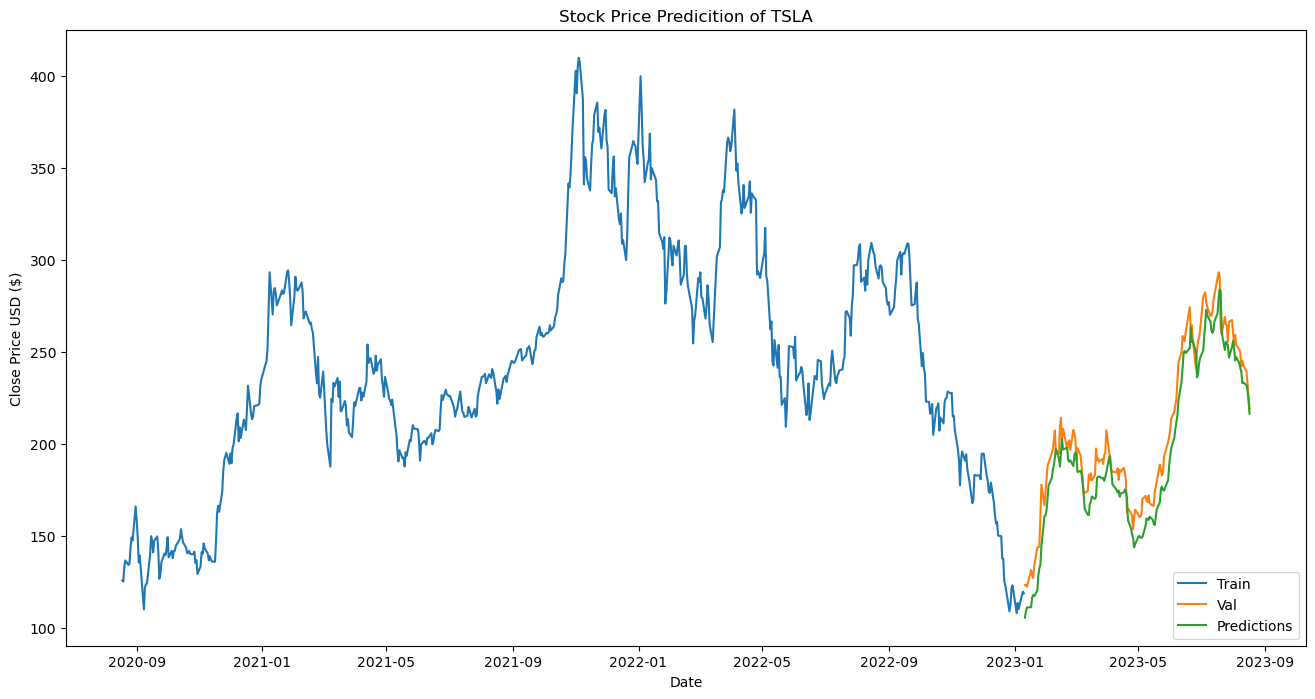

In [36]:
# visualize the result by plotting it
plot_graph(company_list[4], symbols[4], TSLA[6])

The prediction prices are always lower than the real prices using the model predicting TSLA price. Similar to the model predicting MSFT prices, the price gap of each data point is greater than the firest 3 models. Yet, the predicted price of the last period is very close to the real price. 

# Conclusion

By analyzing the closing price, sales volume, moving average, daily return, and cumulative return of the five stocks, we can gain a more comprehensive understanding of how each individual stock has fared over the past three years. This analysis can help us identify potential relationships between different metrics. For instance, there appears to be a correlation between the closing price and sales volume, evident in the instance of TSLA's sales volume spike in January 2021 coinciding with a significant rise in its stock prices. Furthermore, conducting a direct comparative assessment of the stocks enables us to ascertain their relative performance. Upon inspecting the cumulative returns, it becomes apparent that NVDA stands out as the most promising investment among the five stocks over the preceding three-year period.

In terms of the predictive models for these stocks, it's noteworthy that the disparity between the projected prices and the actual prices never exceeds $15. This demonstrates the strong performance of these models in generating accurate predictions.